In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = []
folders = !ls /datasets01/imagenet_full_size/061417/val/
for f in folders:
    path = "/datasets01/imagenet_full_size/061417/val/" + f
    img = !ls $path
    for k in img:
        images.append(path + "/" + k)

In [3]:
len(images)

50000

In [4]:
import PIL

In [5]:
sizes = []
for img in images:
    img_read = PIL.Image.open(img)
    sizes.append(img_read.size)

In [6]:
len(sizes)

50000

In [7]:
len(set(sizes))

5215

In [8]:
from collections import defaultdict
number = defaultdict(int)
for s in sizes:
    number[s] += 1

In [21]:
v = numpy.array(list(number.values()))
k = numpy.array(list(number.keys()))
k = k[numpy.argsort(v)[::-1]]
v = v[numpy.argsort(v)[::-1]]

In [23]:
k[:10]

array([[500, 375],
       [375, 500],
       [500, 333],
       [500, 500],
       [500, 334],
       [333, 500],
       [500, 400],
       [500, 335],
       [334, 500],
       [500, 332]])

In [45]:
a = []
b = []
c = []
d = []
for l in k:
    a.append(l[0])
    b.append(l[1])
    c.append(max(l[0], l[1]))
    d.append(min(l[0], l[1]))
    if l[0] == 64 or l[1] == 64:
        print(l)

[140  64]
[54 64]


In [42]:
min(c), max(c)

(64, 5005)

In [52]:
d = numpy.array(d)

In [74]:
numpy.sum(d < 100), numpy.sum(d < 150) , numpy.sum(d < 200), numpy.sum(d < 250) , numpy.sum(d < 300), numpy.sum(d < 350), numpy.sum(d < 384) 

(83, 248, 510, 887, 1414, 2022, 2446)

In [75]:
images[0]

'/datasets01/imagenet_full_size/061417/val/n01440764/ILSVRC2012_val_00000293.JPEG'

In [79]:
import os 
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/vit/imagenet_bins/"

for low, high in  [(385, 1e)]:#[(0, 100), (101, 150), (151, 200), (201, 200), (251, 300), (301, 350), (351, 384)]:
    path = prefix + "eval_{}_{}".format(low, high)
    !mkdir $pathss
    for img, s in zip(images, sizes):
        class_name = img.split("/")
        path_folder = path + "/" + img.split("/")[-2]
        path_full = path_folder + "/" + img.split("/")[-1]
        if low <= min(s[0], s[1]) <= high:
            if not os.path.exists(path_folder):
                !mkdir -p $path_folder
            !cp $img $path_full

In [89]:
import os 
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/vit/imagenet_bins/"

for low, high in [(0, 100), (101, 150), (151, 200), (201, 250), (251, 300), (301, 350), (351, 384), (385, 10000)]:
    path = prefix + "eval_{}_{}".format(low, high)
    !mkdir $path
    for img, s in zip(images, sizes):
        class_name = img.split("/")
        path_folder = path + "/" + img.split("/")[-2]
        path_full = path_folder + "/" + img.split("/")[-1]
        if low <= min(s[0], s[1]) <= high:
            if not os.path.exists(path_folder):
                !mkdir -p $path_folder
            !cp $img $path_full

mkdir: cannot create directory ‘/checkpoint/antares/experiments/fl_new_master/augposemb/vit/imagenet_bins/eval_384_10000’: File exists


In [96]:
import os 
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/vit/imagenet_bins/"

for low, high in [(201, 250)]: #[(0, 100), (101, 150), (151, 200), (201, 250), (251, 300), (301, 350), (351, 384), (385, 10000)]:
    path = prefix + "eval_max_{}_{}".format(low, high)
    !mkdir $path
    for img, s in zip(images, sizes):
        class_name = img.split("/")
        path_folder = path + "/" + img.split("/")[-2]
        path_full = path_folder + "/" + img.split("/")[-1]
        if low <= max(s[0], s[1]) <= high:
            if not os.path.exists(path_folder):
                !mkdir -p $path_folder
            !cp $img $path_full

mkdir: cannot create directory ‘/checkpoint/antares/experiments/fl_new_master/augposemb/vit/imagenet_bins/eval_max_201_250’: File exists


In [95]:
for low, high in  [(0, 100), (101, 150), (151, 200), (201, 250), (251, 300), (301, 350), (351, 384), (385, 10000)]:
    n = 0
    min_val = 100000
    max_val = 0
    for img, s in zip(images, sizes):
        if low <= max(s[0], s[1]) <= high:
            n += 1
            min_val = min(min_val, min(s[0], s[1]))
            max_val = max(max_val, min(s[0], s[1]))
#     print(low, high, n, min_val, max_val)
    print(max_val)

100
150
200
250
300
350
380
3646


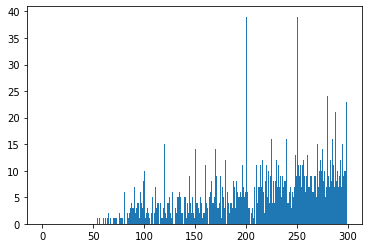

In [50]:
plt.hist(d, bins=numpy.arange(300));

(0.0, 700.0)

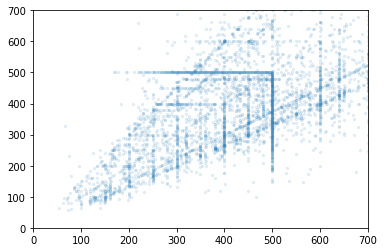

In [33]:
plt.scatter(a, b, s=5, alpha=0.1)
plt.ylim(0, 700)
plt.xlim(0, 700)

In [17]:
k[v > 100], v[v > 100]

(array([[ 500,  375],
        [ 500,  399],
        [ 375,  500],
        [ 500,  500],
        [ 334,  500],
        [1024,  768],
        [ 500,  333],
        [ 500,  334],
        [ 640,  480],
        [ 500,  332],
        [ 335,  500],
        [ 500,  336],
        [ 500,  374],
        [ 400,  500],
        [ 500,  354],
        [ 500,  357],
        [ 500,  335],
        [ 800,  600],
        [ 500,  400],
        [ 500,  377],
        [ 376,  500],
        [ 500,  376],
        [ 500,  383],
        [ 500,  378],
        [ 333,  500],
        [ 332,  500]]),
 array([15487,   108,  4774,  1610,   372,   157,  2783,  1017,   317,
          348,   126,   110,   241,   284,   108,   217,   376,   187,
          733,   179,   104,   262,   101,   120,   998,   125]))

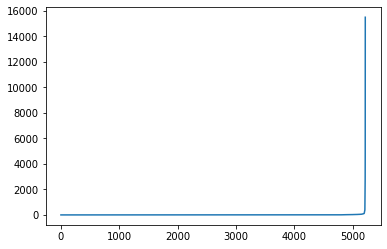

In [10]:
plt.plot(numpy.sort(list(number.values())))